# 1変量の基本統計：height

クレンジング済みの身体調査データをデータフレームに取り込んで，変量について個別に基本統計を取ります．
ただしクレンジング済みではありますが，データに間違いがないとは言えないことを忘れてはいけません．
基本統計を調べる過程でデータに潜む間違いも発見していきます．

まずは，変量 height について調べます．
最初に必要となるライブラリーを搬入します．

```Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

クレンジング済みのデータがCSVファイルに格納されているので，それを取り込んでデータフレームを構築します．

```Python
df = pd.read_csv('./cleansed_body_data.csv')
df.set_index('person',inplace=True)
```

In [2]:
df = pd.read_csv('./cleansed_body_data.csv')
df.set_index('person',inplace=True)

*****
## 基本統計量

ここからデータに対して純粋な記述統計を行います．
データフレームには，<font color=green>describe()</font>という便利な関数があります．
describe関数は，大半の基本統計量を一括して求めてくれます．

```Python
df.height.describe()
```

In [3]:
df.height.describe()

count     200.000000
mean      169.107500
std       103.481227
min        77.300000
25%       155.250000
50%       162.350000
75%       170.750000
max      1609.000000
Name: height, dtype: float64

結果について確認します．

|記述|値|統計量|
|:---:|:---:|:---:|
|count| 200.000000 |有効な値を持つデータ件数|
|mean | 169.307500 |平均値     |
|std  | 103.477886 |標準偏差   |
|min  |  77.300000 |最小値     |
|25%  | 155.250000 |第1四分位数|
|50%  | 162.850000 |中央値     |
|75%  | 171.400000 |第3四分位数|
|max  |1609.000000 |最大値     |

## 最大値の確認

この結果で注目すべき値が最大値です．
この変量は身長(cm)です．
最大値=1609 cm は，明らかに異常です．
この値の影響で，平均値と標準偏差が信頼できない値になっています．

念のために値の分布をヒストグラムで表示してみます．

```Python
plt.hist(df.height,bins=20,color='lightcyan',edgecolor='black')
plt.xlabel('Height (cm)')
plt.ylabel('Counts')
plt.show()
```

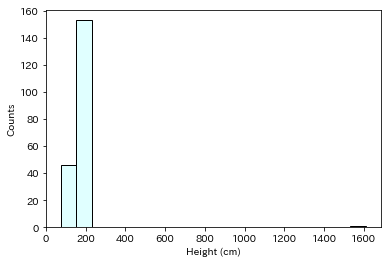

In [4]:
plt.hist(df.height,bins=20,color='lightcyan',edgecolor='black')
plt.xlabel('Height (cm)')
plt.ylabel('Counts')
plt.show()

やはり，最大値が異常値として，分布から大きく外れていることが分かります．

この値が誰の値であるか調査します．
最大値と同じ値を持つ人のデータを検出します．

```Python
df[df.height==1609.0]
```

In [5]:
df[df.height==1609.0]

,height,weight,age,gender,blood
person,,,,,
p060,1609.0,95.2,64.0,Male,B


## p060のデータについて調査して修正

この異常値を持つ対象が p060 であることが分かりました．

測定時の原本に戻って確認したところ，この人の身長は 160.9 cm でした．
電子化するときに誤って 1609 と登録してしまったようです．
そこで，この値を修正します．

```Python
df.at['p060','height'] = 160.9
df.height['p060']
```

In [6]:
df.at['p060','height'] = 160.9
df.height['p060']

160.90000000000001

再度ヒストグラムを表示します．
今度は，データが問題なく分布していることが分かります．

```Python
plt.hist(df.height,bins=20,color='lightcyan',edgecolor='black')
plt.xlabel('Height (cm)')
plt.ylabel('Counts')
plt.show()
```

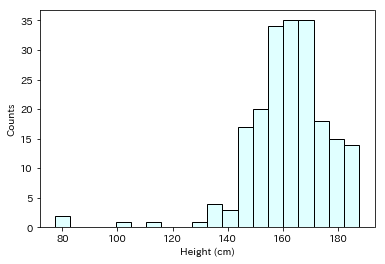

In [7]:
plt.hist(df.height,bins=20,color='lightcyan',edgecolor='black')
plt.xlabel('Height (cm)')
plt.ylabel('Counts')
plt.show()

さらに基本統計量を再度確認します．

```Python
df.height.describe()
```

In [8]:
df.height.describe()

count    200.000000
mean     161.867000
std       15.410057
min       77.300000
25%      155.250000
50%      162.250000
75%      170.700000
max      187.800000
Name: height, dtype: float64

データ修正前と比較して，平均値と標準偏差が大きく変化していることが分かります．
データ修正前とは異なり，平均値が中央値に近い値になっています．

## 最小値の確認

今度は最小値です．
身長の最小値が 77.3 cm について問題が無いか確認します．
まず対象者を特定します．

```Python
df[df.height==77.3]
```

In [9]:
df[df.height==77.3]

,height,weight,age,gender,blood
person,,,,,
p096,77.3,9.9,1.0,Female,NaN


対象者は p096 であることが分かりました．
この対象者のデータは次の通りです．

- 身長： 77.3 cm
- 体重： 9.9 kg
- 年齢： 1 歳
- 性別： 女性
- 血液型： 不明

1歳の乳幼児であり，身体データとしては標準的であることが分かります．
よって，このデータは異常値ではありません．

*****
## 修正済みデータのCSVファイルへの保管

修正したデータを新しいCSVファイルに保管します．



In [10]:
df.to_csv('./cleansed_body_data2.csv')

以上で，変量 height の基本統計を終わります．

*****